<a href="https://colab.research.google.com/github/reesecake/Video-Game-Sales/blob/main/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video Game Sales EDA**

---

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
import io

df = pd.read_csv(io.StringIO(uploaded['vgsales.csv'].decode('utf-8')))
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df['Rank'] = list(map(int, df['Rank']))
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [ ]:
print(df['Rank'].isnull().values.any())
print(df['Name'].isnull().values.any())
print(df['Platform'].isnull().values.any())
print(df['Year'].isnull().values.any())
print(df['Genre'].isnull().values.any())
print(df['Publisher'].isnull().values.any())
print(df['NA_Sales'].isnull().values.any())
print(df['EU_Sales'].isnull().values.any())
print(df['JP_Sales'].isnull().values.any())
print(df['Other_Sales'].isnull().values.any())
print(df['Global_Sales'].isnull().values.any())

False
False
False
True
False
True
False
False
False
False
False


Null values exist in the dataset

Drop the rows with na values

In [ ]:
df = df.dropna(axis=0, subset=['Year','Publisher'])

### Heatmap

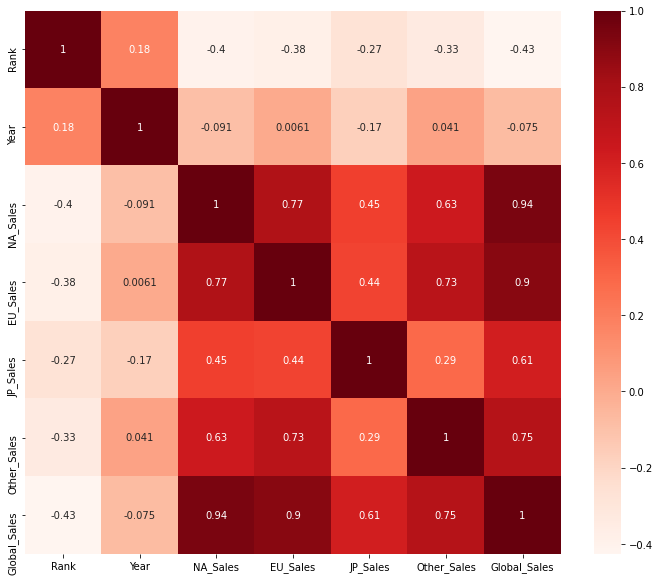

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Using Plotly open source graphing libraries

https://plotly.com/graphing-libraries/

In [ ]:
games = df['Name'].unique()
publisher = df['Publisher'].unique()
platforms = df['Platform'].unique()
genres = df['Genre'].unique()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'gold','size':20}},
    number={'font':{'color': 'gold','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'deepskyblue','size':20}},
    number={'font':{'color': 'deepskyblue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

In [ ]:
import plotly.graph_objects as go

# Video Game Count by Year
yearwisegame = df.groupby('Year')['Name'].count().reset_index()

In [ ]:
# Yearwise Total Game Published
fig = go.Figure(go.Bar(x=yearwisegame['Year'],y=yearwisegame['Name'], marker={'color': yearwisegame['Name'],'colorscale': 'Plotly3'}))
fig.update_layout(title_text='Video Game Release by Year',xaxis_title="Year",yaxis_title="Number of Games Released")
fig.show()

## ***Create the training and testing sets***

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

y_train = np.array(train['Rank'])
y_test = np.array(test['Rank'])

def build_data(df):
    x_matrix = df[['Year', 'Global_Sales']].copy()

    # add a constant
    x_matrix = sm.add_constant(x_matrix)
    
    return x_matrix


x_train = build_data(train)
x_test = build_data(test)

# YOUR CODE
Y = y_train

# YOUR CODE
X = x_train
X.shape, Y.shape

((11403, 3), (11403,))

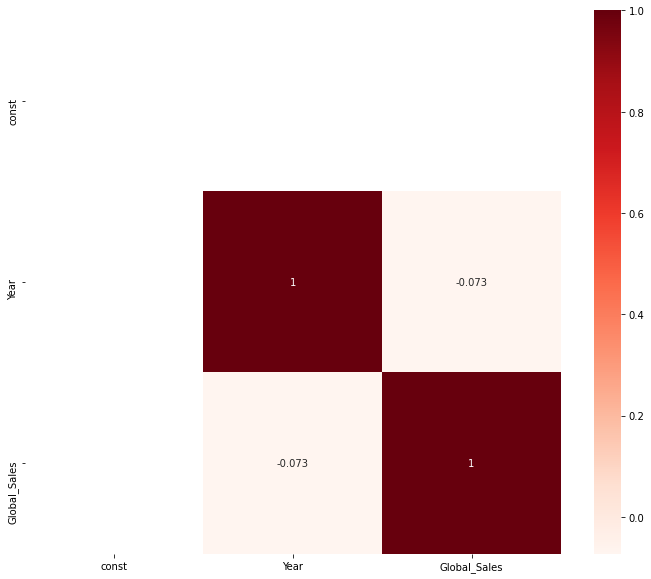

In [ ]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

[118056.54877859005, 1.00535665304352, 1.0053566530435205]

## ***Using Ordinary Least Squares Regression Model***

In [ ]:
results_sm = sm.OLS(endog=Y.astype(float), exog=X.astype(float), hasconst=True).fit()

# beta0_sm = results_sm.params[0]
# beta1_sm = results_sm.params[1]

# print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.6f} and beta_1 = {beta1_sm:8.6f}')

In [ ]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1459.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:12:55   Log-Likelihood:            -1.1150e+05
No. Observations:               11403   AIC:                         2.230e+05
Df Residuals:                   11400   BIC:                         2.230e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.379e+05   1.37e+04    -17.313   

The $R^2$ and adj. $R^2$ of the model

In [ ]:
results_sm.rsquared, results_sm.rsquared_adj

(0.203815574248161, 0.203675892769959)

## ***Using multiple linear regression***

In [ ]:
# Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [ ]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.20307653769651524


## ***Using Polynomial Regression***

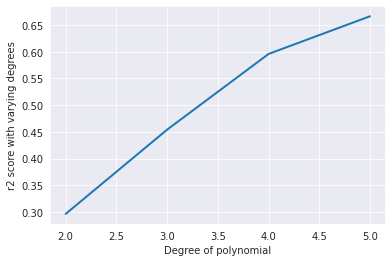

In [ ]:
# Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [ ]:
# Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.6663218727986215


## ***K-Nearest Neighbors Regression***

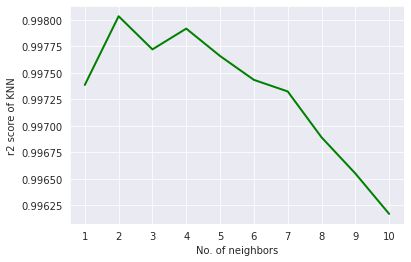

In [ ]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()  

In [ ]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=2)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.9980337953777206


## ***Decision Tree Regression***

In [ ]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [ ]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9991617344532556


## ***Random Forest Regression***

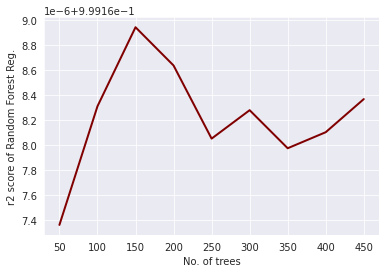

In [ ]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [ ]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9991683094149643


---

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [ ]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

[[ 0.          0.94949957  4.95134992]
 [ 0.         -1.78290259 -0.23740611]
 [ 0.          0.26639903  0.08407816]
 ...
 [ 0.          0.43717416 -0.21168737]
 [ 0.         -1.09980205 -0.20525768]
 [ 0.          0.6079493  -0.23740611]]
[[ 0.          0.94949957 -0.2824139 ]
 [ 0.          0.26639903 -0.12810146]
 [ 0.          0.26639903 -0.31456233]
 ...
 [ 0.         -1.09980205 -0.17310925]
 [ 0.         -0.41670151 -0.00593744]
 [ 0.          0.6079493  -0.29527327]]
[[ 0.48849928]
 [-0.59626169]
 [ 1.05031768]
 ...
 [-0.40731681]
 [-0.93841076]
 [ 0.66051436]]
[[-1.70777591]
 [ 0.01028481]
 [-1.092451  ]
 ...
 [-0.16068522]
 [-0.21419173]
 [ 0.0100758 ]]


## ***Linear Support Vector Regression***

In [ ]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [ ]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

-0.8609088699927294


## ***Non-linear Support Vector Regression***

In [ ]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [ ]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.953271120169541


---

In [ ]:
## Applying XGBoost Regression model on the training set
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

[22:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [ ]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.999189385785272


## ***Comparing the R2 Scores***

In [ ]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[20.308, 66.632, 99.803, 99.916, 99.917, -86.091, 95.327, 99.919]


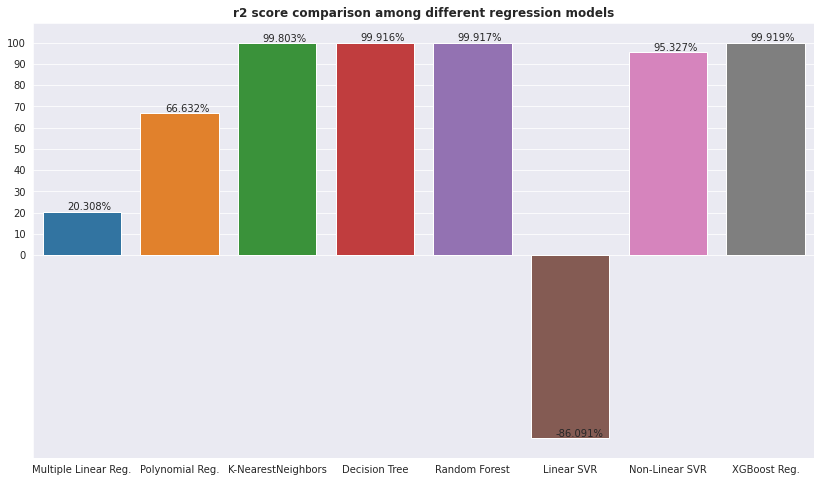

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x + 0.25, y + height + 0.8))
plt.show()